In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import LeakyReLU, PReLU, Activation, Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D, MaxPooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:

def plot_acc_loss(result):
  # function to plot the accuracy and loss graphs
  acc = result.history['accuracy']
  val_acc = result.history['val_accuracy']
  loss = result.history['loss']
  val_loss = result.history['val_loss']

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title("Training and Validation Accuracy")
  plt.plot(acc,color = 'green',label = 'Training Acuracy')
  plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(loss,color = 'blue',label = 'Training Loss')
  plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


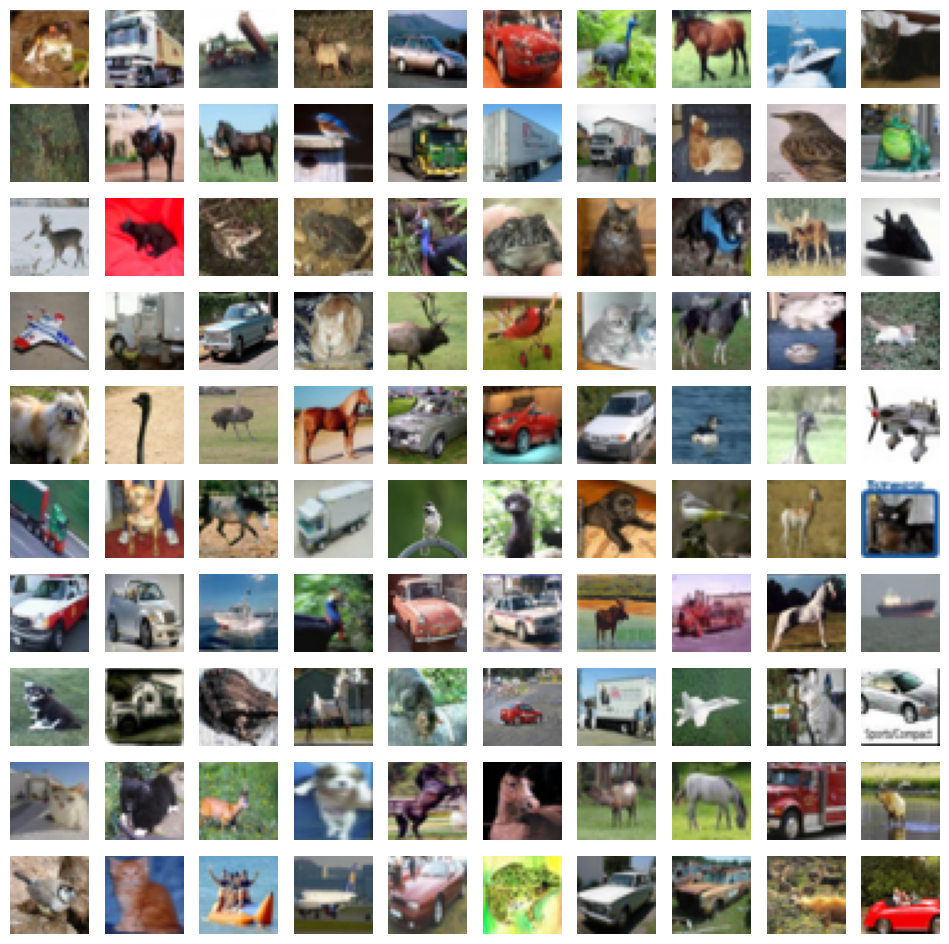

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

plt.figure(figsize=(12,12))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i],cmap='gray')

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size = 0.2)
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
y_test = to_categorical(Y_test, num_classes = 10)
x_train = x_train * 1.0/255

x_val = x_val * 1.0/255

X_test = X_test * 1.0/255

In [ ]:
print(x_train.shape, x_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000, 10) (10000, 10) (10000, 10)


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(x_train)
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)

Epoch 1/30
625/625 [==============================] - 78s 122ms/step - loss: 1.5744 - accuracy: 0.4306 - val_loss: 1.3360 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 79s 127ms/step - loss: 1.0963 - accuracy: 0.6090 - val_loss: 1.7204 - val_accuracy: 0.4857 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 78s 125ms/step - loss: 0.8765 - accuracy: 0.6961 - val_loss: 0.7624 - val_accuracy: 0.7278 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 79s 126ms/step - loss: 0.7428 - accuracy: 0.7431 - val_loss: 0.8768 - val_accuracy: 0.6972 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 80s 128ms/step - loss: 0.6641 - accuracy: 0.7732 - val_loss: 0.7605 - val_accuracy: 0.7476 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 82s 132ms/step - loss: 0.5996 - accuracy: 0.7930 - val_loss: 0.7392 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 7/30
625/625 [==============================] 

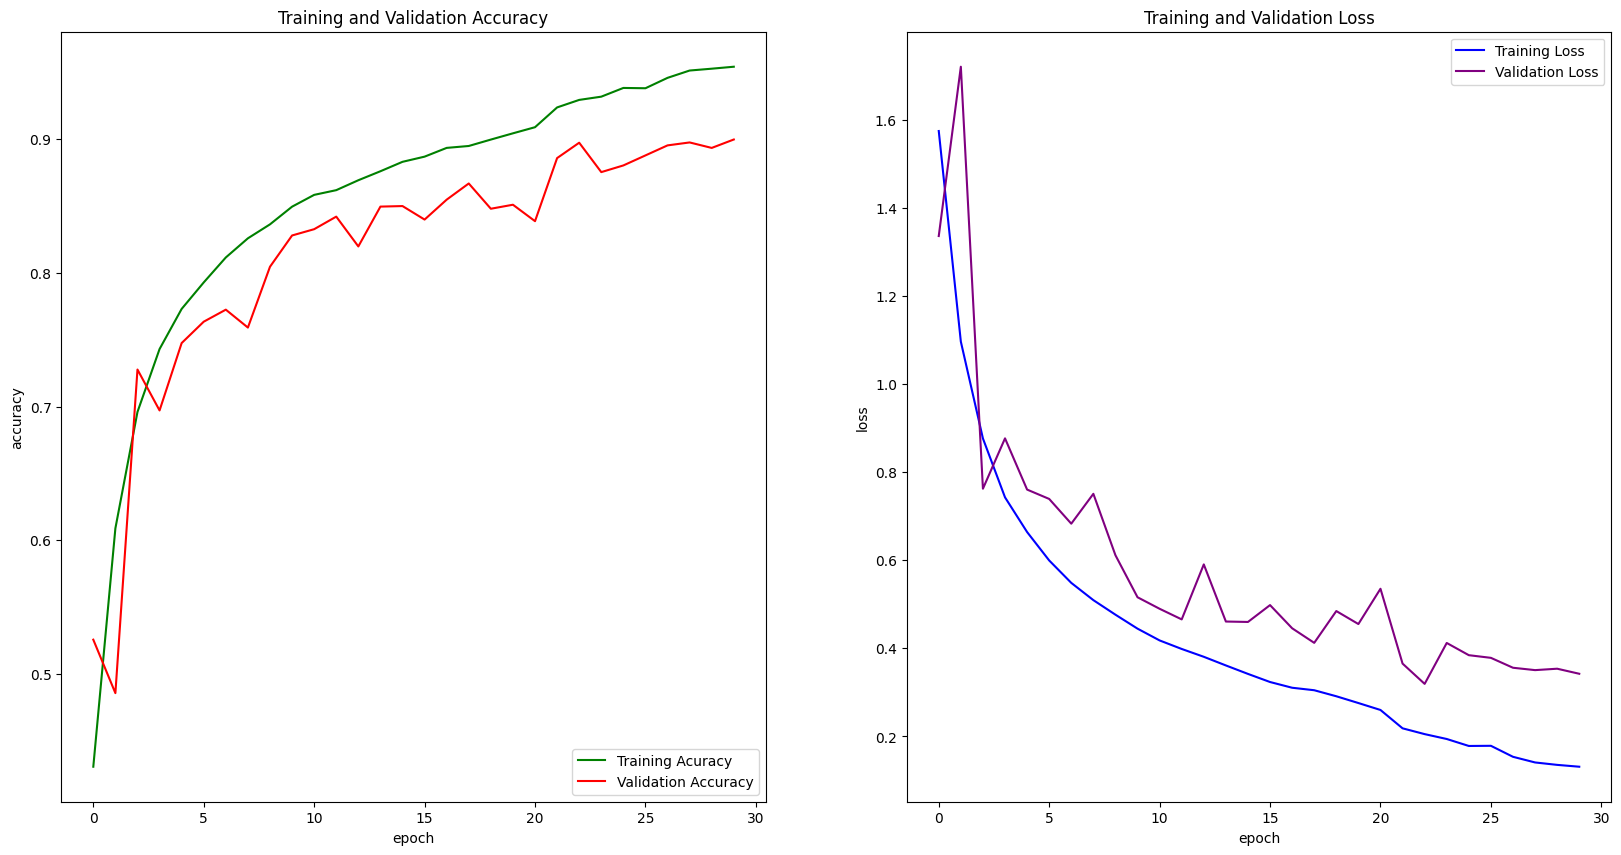

In [ ]:
with tf.device('/GPU:0'):
    model = tf.keras.Sequential([
        Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Conv2D(128, (5, 5), padding='same'),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.1),

        Conv2D(256, (3, 3), padding='same'),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same'),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(256, (3, 3), padding='same'),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        BatchNormalization(),
        Conv2D(256, (3, 3), padding='same'),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),

        GlobalAveragePooling2D(),
        Dense(512),
        PReLU(),
        #LeakyReLU(alpha=0.01),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_datagen.flow(x_train, y_train, batch_size=64),
        steps_per_epoch=x_train.shape[0] // 64,
        epochs=30,
        validation_data=(x_val, y_val),
        callbacks=[learning_rate_reduction]
    )

plot_acc_loss(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.3533 - accuracy: 0.8977


In [ ]:
model.save(r"C:\Users\quinn\Desktop\DeepLearningFinal\model.keras")

In [ ]:
reconstructed_model = tf.keras.models.load_model(r"C:\Users\quinn\Desktop\DeepLearningFinal\model.keras")

#### Experiment 2

In [ ]:
! pip install tinyimagenet
from tinyimagenet import TinyImageNet
from pathlib import Path
import logging

logging.basicConfig(level=logging.INFO)
split= "val"
def get_dataset(split): return TinyImageNet(Path("~/.torchvision/tinyimagenet/"),split=split,imagenet_idx=False)

tiny_train_dataset = get_dataset("train")
tiny_val_dataset = get_dataset("val")


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

100%|██████████| 248100043/248100043 [00:33<00:00, 7435246.18it/s]


Extracting /root/.torchvision/tinyimagenet/tiny-imagenet-200.zip to /root/.torchvision/tinyimagenet


In [ ]:
from keras.applications import VGG19

vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, PReLU, GlobalAveragePooling2D

model = Sequential()

for layer in vgg19_model.layers[:-1]:
  model.add(layer)

for layer in model.layers:
  layer.trainable = False


model.add(Dropout(0.5))
model.add(Dense(200, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
from keras.datasets import cifar10
(x_train, y_train) , (x_val, y_val) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
import matplotlib.pyplot as plt

NUM_CLASSES = 10

# Onehot encode labels

y_train = to_categorical(y_train, NUM_CLASSES)
y_val = to_categorical(y_val, NUM_CLASSES)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [ ]:
# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
import cv2
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i])
  else:
    print("error, please specify train or val")

  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch

In [ ]:
EPOCHS = 30
BATCH_SIZE = 128
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0

  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]

  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")

  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")

Epoch: 0
Training Loss = 1.777445948123932	Training Acc = 0.50515625
16/16 [==============================] - 14s 488ms/step - loss: 0.8808 - categorical_accuracy: 0.7240
Validation loss: 0.880804181098938	Validation Acc: 0.7239999771118164

Epoch: 1
Training Loss = 1.1028805732727052	Training Acc = 0.67515625
16/16 [==============================] - 3s 156ms/step - loss: 0.7162 - categorical_accuracy: 0.7600
Validation loss: 0.7161789536476135	Validation Acc: 0.7599999904632568

Epoch: 2
Training Loss = 1.0543384122848511	Training Acc = 0.68234375
16/16 [==============================] - 3s 156ms/step - loss: 0.6813 - categorical_accuracy: 0.7720
Validation loss: 0.6813164949417114	Validation Acc: 0.7720000147819519

Epoch: 3
Training Loss = 0.9243481290340424	Training Acc = 0.7121875
16/16 [==============================] - 3s 157ms/step - loss: 0.7334 - categorical_accuracy: 0.7240
Validation loss: 0.7333991527557373	Validation Acc: 0.7239999771118164

Epoch: 4
Training Loss = 0.854

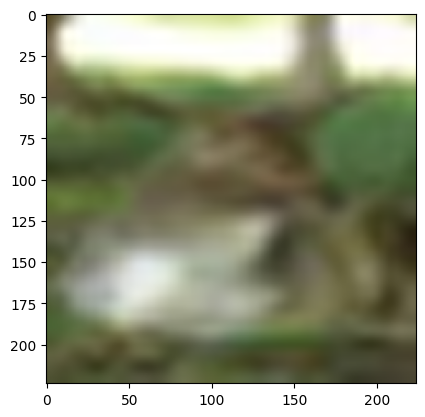

1/1 [==============================] - 1s 1s/step
pred: deer
acct: deer


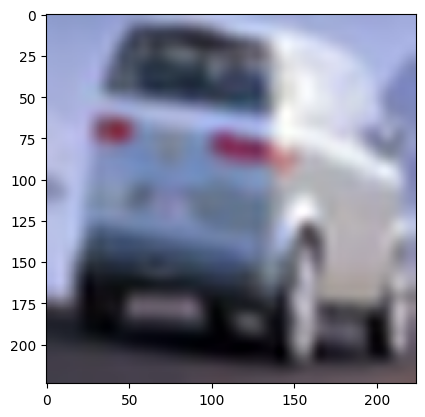

1/1 [==============================] - 0s 34ms/step
pred: automobile
acct: automobile


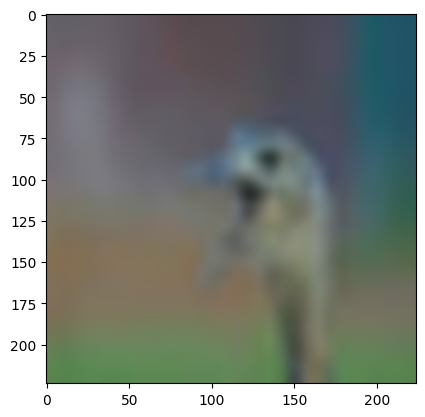

1/1 [==============================] - 0s 24ms/step
pred: bird
acct: bird


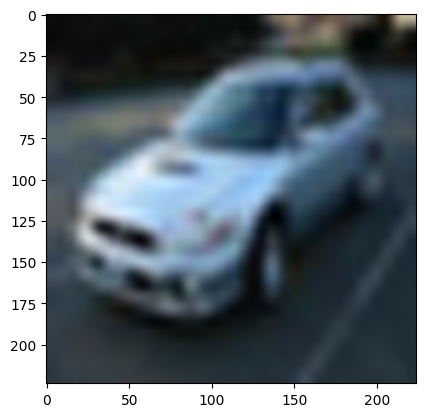

1/1 [==============================] - 0s 18ms/step
pred: automobile
acct: automobile


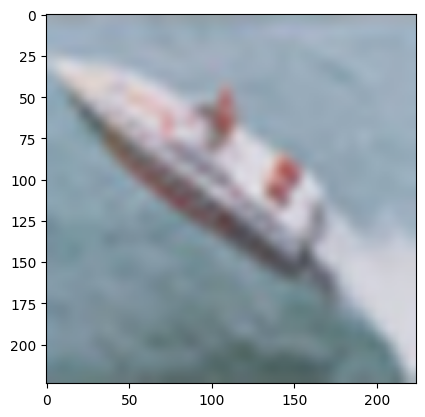

1/1 [==============================] - 0s 18ms/step
pred: ship
acct: ship


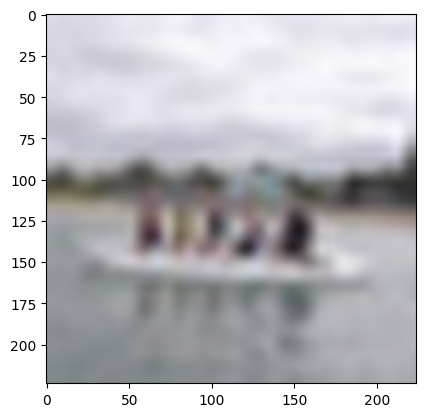

1/1 [==============================] - 0s 19ms/step
pred: ship
acct: ship


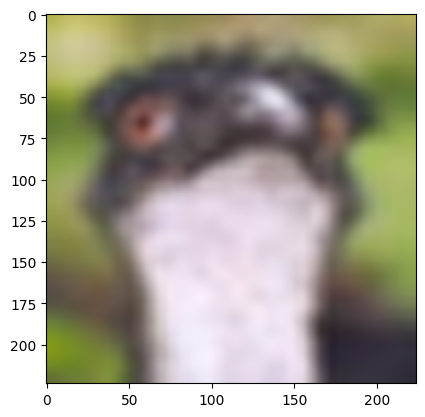

1/1 [==============================] - 0s 21ms/step
pred: bird
acct: bird


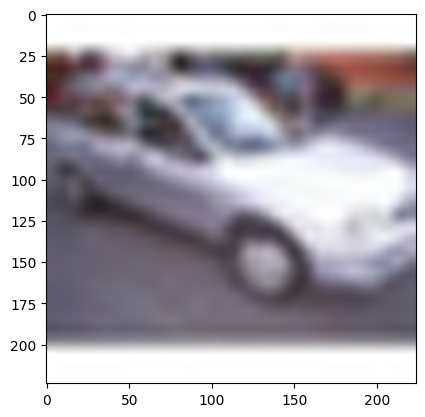

1/1 [==============================] - 0s 19ms/step
pred: automobile
acct: automobile


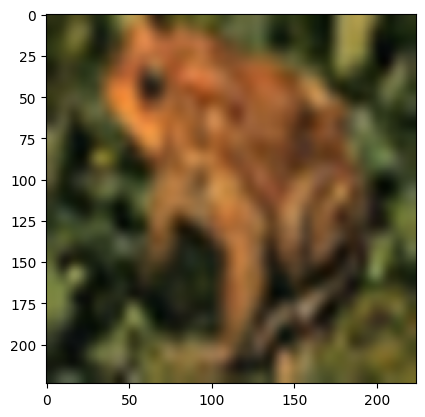

1/1 [==============================] - 0s 18ms/step
pred: frog
acct: frog


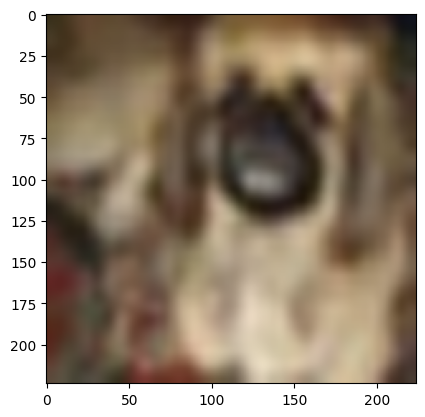

1/1 [==============================] - 0s 25ms/step
pred: cat
acct: dog


In [ ]:
# Sample outputs from validation set
CATEGORIES = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])

In [ ]:
x_v, y_v = getBatch(VAL_SIZE, "val")
eval1 = model.evaluate(x_v, y_v)
print(f"Validation loss: {eval1[0]}\tValidation Acc: {eval1[1]}\n")

16/16 [==============================] - 2s 147ms/step - loss: 0.5274 - categorical_accuracy: 0.8140
Validation loss: 0.5273703932762146	Validation Acc: 0.8140000104904175



In [ ]:
from google.colab import drive

drive.mount( '/content/drive', force_remount=True )

! git clone https://github.com/seshuad/IMagenet
! ls 'IMagenet/tiny-imagenet-200/'
!pip install scipy

import time
import numpy as np
import imageio

path = 'IMagenet/tiny-imagenet-200/'

def get_id_dictionary():
    id_dict = {}
    for i, line in enumerate(open( path + 'wnids.txt', 'r')):
        id_dict[line.replace('\n', '')] = i
    return id_dict

def get_class_to_id_dict():
    id_dict = get_id_dictionary()
    all_classes = {}
    result = {}
    for i, line in enumerate(open( path + 'words.txt', 'r')):
        n_id, word = line.split('\t')[:2]
        all_classes[n_id] = word
    for key, value in id_dict.items():
        result[value] = (key, all_classes[key])
    return result

def get_data(id_dict):
    print('starting loading data')
    train_data, test_data = [], []
    train_labels, test_labels = [], []
    t = time.time()
    for key, value in id_dict.items():
        train_data += [imageio.imread( path + 'train/{}/images/{}_{}.JPEG'.format(key, key, str(i)), mode='RGB') for i in range(500)]
        train_labels_ = np.array([[0]*200]*500)
        train_labels_[:, value] = 1
        train_labels += train_labels_.tolist()

    for line in open( path + 'val/val_annotations.txt'):
        img_name, class_id = line.split('\t')[:2]
        test_data.append(imageio.imread( path + 'val/images/{}'.format(img_name) ,mode='RGB'))
        test_labels_ = np.array([[0]*200])
        test_labels_[0, id_dict[class_id]] = 1
        test_labels += test_labels_.tolist()

    print('finished loading data, in {} seconds'.format(time.time() - t))
    return np.array(train_data), np.array(train_labels), np.array(test_data), np.array(test_labels)

train_data, train_labels, test_data, test_labels = get_data(get_id_dictionary())

print( "train data shape: ",  train_data.shape )
print( "train label shape: ", train_labels.shape )
print( "test data shape: ",   test_data.shape )
print( "test_labels.shape: ", test_labels.shape )

Mounted at /content/drive
fatal: destination path 'IMagenet' already exists and is not an empty directory.
test  train  val  wnids.txt  words.txt
starting loading data


<ipython-input-7-73b177c83ad3>:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  train_data += [imageio.imread( path + 'train/{}/images/{}_{}.JPEG'.format(key, key, str(i)), mode='RGB') for i in range(500)]
<ipython-input-7-73b177c83ad3>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  test_data.append(imageio.imread( path + 'val/images/{}'.format(img_name) ,mode='RGB'))


finished loading data, in 66.47043561935425 seconds
train data shape:  (100000, 64, 64, 3)
train label shape:  (100000, 200)
test data shape:  (10000, 64, 64, 3)
test_labels.shape:  (10000, 200)


In [ ]:
def shuffle_data(train_data, train_labels ):
    size = len(train_data)
    train_idx = np.arange(size)
    np.random.shuffle(train_idx)

    return train_data[train_idx], train_labels[train_idx]

train_data, train_labels = shuffle_data(train_data, train_labels)

# The data, shuffled and split between train and test sets:
X_train = train_data
Y_train = train_labels
X_test = test_data
Y_test = test_labels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# subtract mean and normalize
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image
X_train /= 128.
X_test /= 128.

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [ ]:
!wget -O tiny-imagenet-200.zip http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2024-05-06 18:27:19--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs231n.stanford.edu/tiny-imagenet-200.zip [following]
--2024-05-06 18:27:20--  https://cs231n.stanford.edu/tiny-imagenet-200.zip
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  7.32MB/s    in 62s     

2024-05-06 18:28:23 (3.79 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip tiny-imagenet-200.zip

Streaming output truncated to the last 5000 lines.
  inflating: tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating: tiny-imagenet-200/val/images/val_6697.JPEG  
  inflating: tiny-imagenet-200/val/images/val_9969.JPEG  
  inflating: tiny-ima

In [ ]:

DIR_MAIN = 'tiny-imagenet-200/'
DIR_TRAIN = DIR_MAIN + 'train/'
DIR_VAL = DIR_MAIN + 'val/'
DIR_TEST = DIR_MAIN + 'test/'

# Number of labels - 200
labels = os.listdir(DIR_TRAIN)

# Initialize labels encoder
encoder_labels = LabelEncoder()
encoder_labels.fit(labels)

# Create lists of files and labels for training (100'000 items)
files_train = []
labels_train = []
for label in labels:
    for filename in os.listdir(DIR_TRAIN + label + '/images/'):
        files_train.append(DIR_TRAIN + label + '/images/' + filename)
        labels_train.append(label)

# Create lists of files and labels for validation (10'000 items)
files_val = []
labels_val = []
for filename in os.listdir(DIR_VAL + 'images/'):
    files_val.append(DIR_VAL + 'images/' + filename)

val_df = pd.read_csv(DIR_VAL + 'val_annotations.txt', sep='\t', names=["File", "Label", "X1", "Y1", "X2", "Y2"], usecols=["File", "Label"])
for f in files_val:
    l = val_df.loc[val_df['File'] == f[len(DIR_VAL + 'images/'):]]['Label'].values[0]
    labels_val.append(l)

# List of files for testing (10'000 items)
files_test = []
for filename in os.listdir(DIR_TEST + 'images/'):
    files_test.append(DIR_TEST + 'images/' + filename)
    files_test = sorted(files_test)

print("The first five files from the list of train images:", files_train[:5])
print("\nThe first five labels from the list of train labels:", labels_train[:5])
print("\nThe first five files from the list of validation images:", files_val[:5])
print("\nThe first five labels from the list of validation labels:", labels_val[:5])
print("\nThe first five files from the list of test images:", files_test[:5])

The first five files from the list of train images: ['tiny-imagenet-200/train/n04560804/images/n04560804_300.JPEG', 'tiny-imagenet-200/train/n04560804/images/n04560804_304.JPEG', 'tiny-imagenet-200/train/n04560804/images/n04560804_249.JPEG', 'tiny-imagenet-200/train/n04560804/images/n04560804_181.JPEG', 'tiny-imagenet-200/train/n04560804/images/n04560804_23.JPEG']

The first five labels from the list of train labels: ['n04560804', 'n04560804', 'n04560804', 'n04560804', 'n04560804']

The first five files from the list of validation images: ['tiny-imagenet-200/val/images/val_1820.JPEG', 'tiny-imagenet-200/val/images/val_4160.JPEG', 'tiny-imagenet-200/val/images/val_5394.JPEG', 'tiny-imagenet-200/val/images/val_4787.JPEG', 'tiny-imagenet-200/val/images/val_6297.JPEG']

The first five labels from the list of validation labels: ['n02129165', 'n02099712', 'n04532670', 'n04070727', 'n01944390']

The first five files from the list of test images: ['tiny-imagenet-200/test/images/test_0.JPEG', '

In [ ]:
class ImagesDataset(Dataset):
    def __init__(self, files, labels, encoder, transforms, mode):
        super().__init__()
        self.files = files
        self.labels = labels
        self.encoder = encoder
        self.transforms = transforms
        self.mode = mode

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):
        pic = Image.open(self.files[index]).convert('RGB')

        if self.mode == 'train' or self.mode == 'val':
            x = self.transforms(pic)
            label = self.labels[index]
            y = self.encoder.transform([label])[0]
            return x, y
        elif self.mode == 'test':
            x = self.transforms(pic)
            return x, self.files[index]

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
    transforms.RandomErasing(p=0.5, scale=(0.06, 0.08), ratio=(1, 3), value=0, inplace=True)
])

transforms_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262])
])

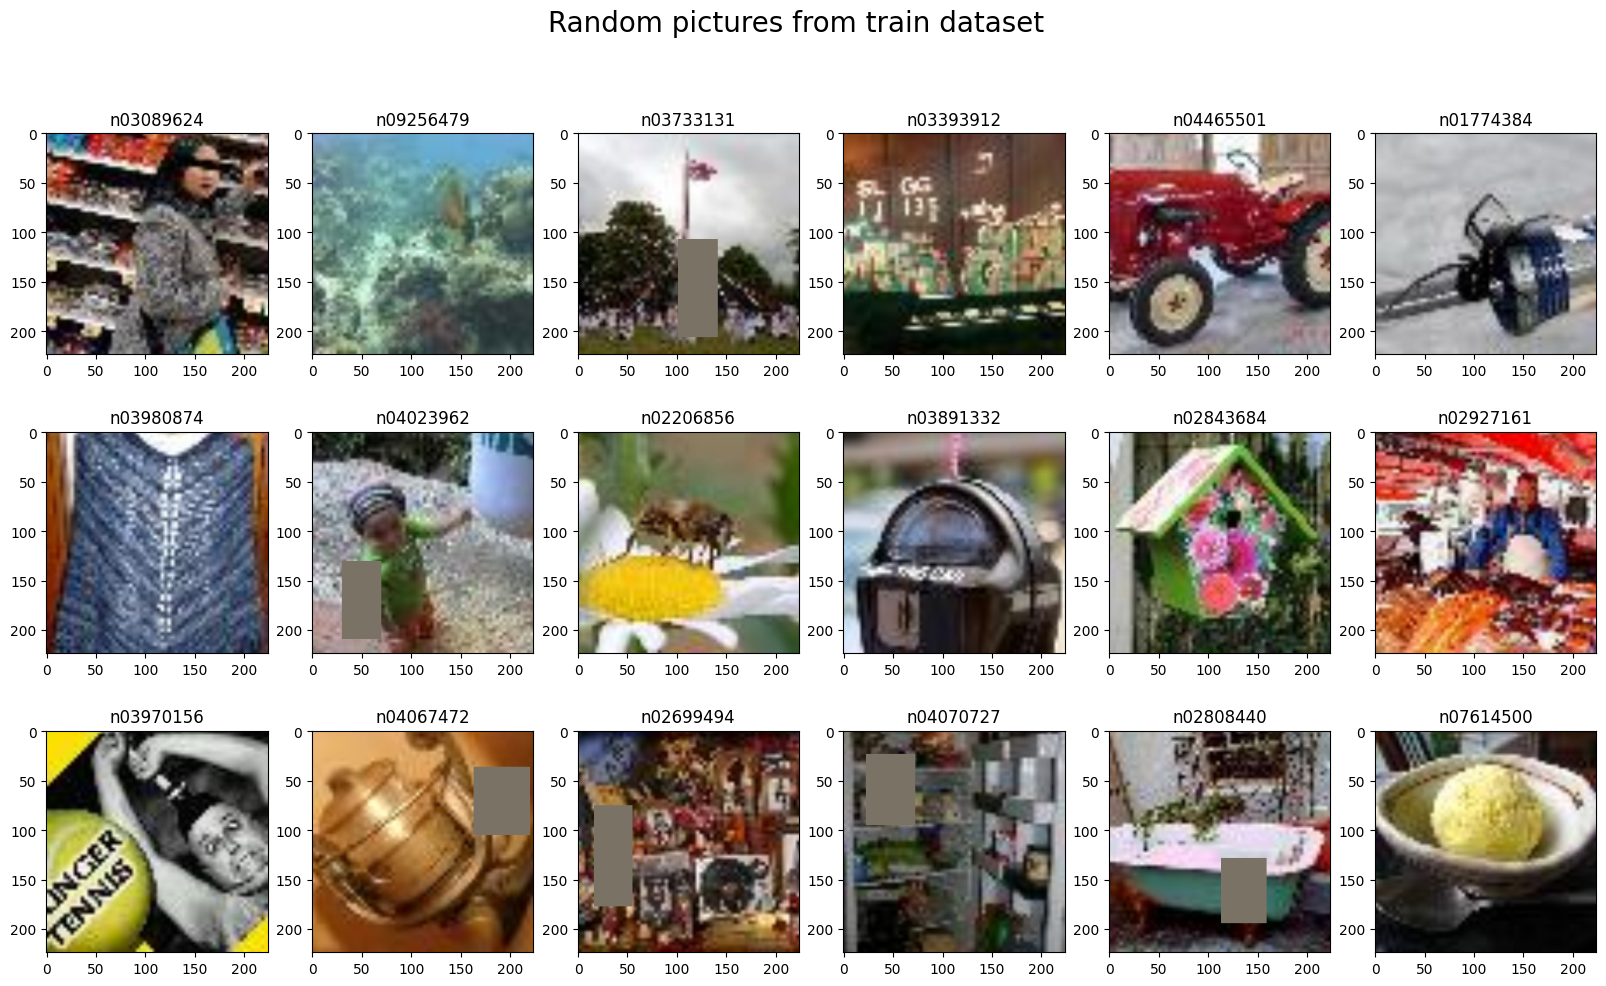

In [ ]:
train_dataset = ImagesDataset(files=files_train,
                              labels=labels_train,
                              encoder=encoder_labels,
                              transforms=transforms_train,
                              mode='train')

val_dataset = ImagesDataset(files=files_val,
                            labels=labels_val,
                            encoder=encoder_labels,
                            transforms=transforms_val,
                            mode='val')

test_dataset = ImagesDataset(files=files_test,
                             labels=None,
                             encoder=None,
                             transforms=transforms_val,
                             mode='test')

fig, axs = plt.subplots(3, 6, figsize=(20,11))
fig.suptitle('Random pictures from train dataset', fontsize=20)
for ax in axs.flatten():
    n = np.random.randint(len(train_dataset))
    img = train_dataset[n][0]
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.4802, 0.4481, 0.3975])
    std = np.array([0.2302, 0.2265, 0.2262])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    ax.set_title(encoder_labels.inverse_transform([train_dataset[n][1]])[0])
    ax.imshow(img)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
x_train = []
y_train = []
for x, y in train_dataloader:
  x_train.append(x)
  y_train.append(y)

x_val = []
y_val = []
for x, y in val_dataloader:
  x_val.append(x)
  y_val.append(y)


num_epochs = 30

NameError: name 'DataLoader' is not defined